<a href="https://colab.research.google.com/github/Rajkumar120/aimlj4/blob/main/aiml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2

In [ ]:
path=os.listdir('/content/drive/MyDrive/psorasis2/TRAIN')
classes={'YES':1,'NO':0}

COVERTING TO X_LABLE AND Y_LABLE

In [ ]:
X=[]
Y=[]
for i in classes:
  path1='/content/drive/MyDrive/psorasis2/TRAIN/'+i
  for j in os.listdir(path1):
    img=cv2.imread(path1+'/'+j,0)
    img=cv2.resize(img,(180,180))
    X.append(img)
    Y.append(classes[i])

In [ ]:
np.unique(Y)

array([0, 1])

CONVERTING TO ARRAYS

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
print(X)

[[[ 14  14  14 ... 173 174 173]
  [ 14  15  16 ... 173 174 176]
  [ 16  17  17 ... 172 176 176]
  ...
  [136 131 144 ... 170 168 166]
  [139 135 135 ... 160 158 159]
  [139 137 142 ... 161 162 160]]

 [[103 118 122 ...  94  61  82]
  [125 127  90 ...  49  82  84]
  [106 112  95 ...  81  87  95]
  ...
  [104  96 109 ...  93  94  86]
  [109  99  90 ...  89  94  97]
  [108  92  93 ...  90 102  94]]

 [[145 139 132 ... 149 145 150]
  [140 140 136 ... 150 139 148]
  [134 137 134 ... 146 145 143]
  ...
  [129 125 126 ... 124 140 149]
  [132 127 128 ... 138 128 122]
  [129 130 127 ... 151 143 142]]

 ...

 [[205 204 206 ... 200 200 200]
  [204 205 205 ... 200 200 200]
  [204 205 205 ... 200 199 200]
  ...
  [210 204 200 ... 201 200 197]
  [210 204 200 ... 201 201 198]
  [208 204 200 ... 202 200 199]]

 [[231 231 231 ... 219 219 222]
  [231 231 231 ... 219 219 222]
  [231 231 231 ... 219 219 222]
  ...
  [231 231 231 ... 218 219 224]
  [231 231 231 ... 218 219 224]
  [231 231 231 ... 218 219 2

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
pd.Series(Y).value_counts()

1    1196
0    1054
dtype: int64

In [ ]:
X.shape

(2250, 180, 180)

In [ ]:
Y.shape

(2250,)

PRINTING IMAGES OF FIXED SIZE (180)(180)

In [ ]:
import os
path2="/content/drive/MyDrive/psorasis2/TRAIN/YES"
img_data2=[]
count=0
images=os.listdir(path2)
for img in images:
    img_arr1=cv2.imread(os.path.join(path2,img))
    img_arr1=cv2.resize(img_arr1,(180,180))
    img_data2.append(img_arr1)
    converted = cv2.cvtColor(img_arr1,cv2.COLOR_BGR2RGB)
    plt.figure()
    count=count+1
    plt.imshow(converted,cmap='gray')
    if count==40:
      break


CONVERTING IMAGES TO GRAY SCALE IMAGE

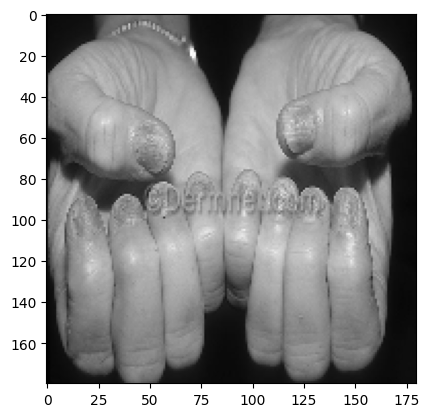

In [ ]:

#for i in range(0,100):
plt.imshow(X[500],cmap='gray')

In [ ]:
X=X.reshape(len(X),-1)
X.shape

(2250, 32400)

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)
A1=training_data_accuracy*100

Accuracy score of the training data :  100.0


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  99.64476021314387


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)*100

96.62522202486679

In [ ]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       258
         100       0.97      0.96      0.97       305

    accuracy                           0.97       563
   macro avg       0.97      0.97      0.97       563
weighted avg       0.97      0.97      0.97       563



In [ ]:
pred=pipe.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[250,   8],
       [ 11, 294]])

Text(95.72222222222221, 0.5, 'Truth values')

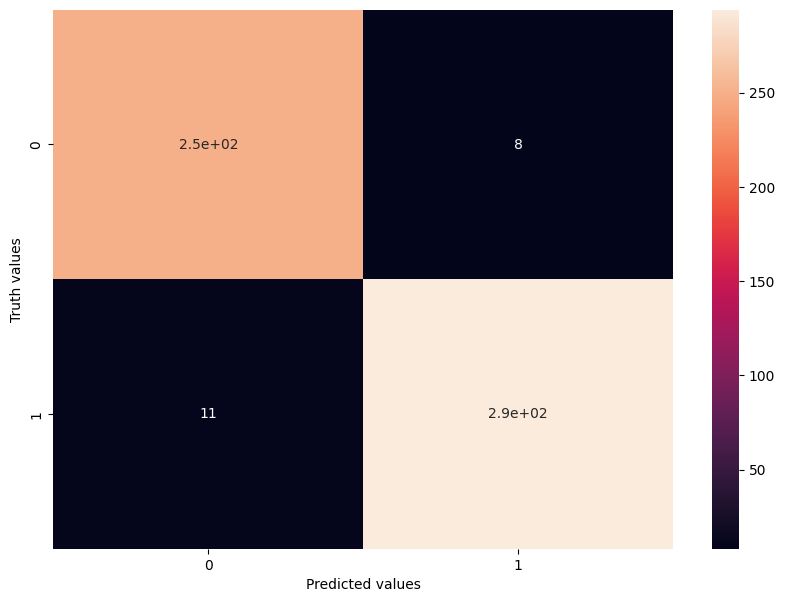

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred)*100)
A2=accuracy_score(Y_test,y_pred)*100

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       264
           1       0.80      0.92      0.85       299

    accuracy                           0.83       563
   macro avg       0.84      0.83      0.83       563
weighted avg       0.84      0.83      0.83       563

accuracy score in knn is: 83.30373001776199


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[115, 149],
       [146, 153]])

Text(95.72222222222221, 0.5, 'Truth values')

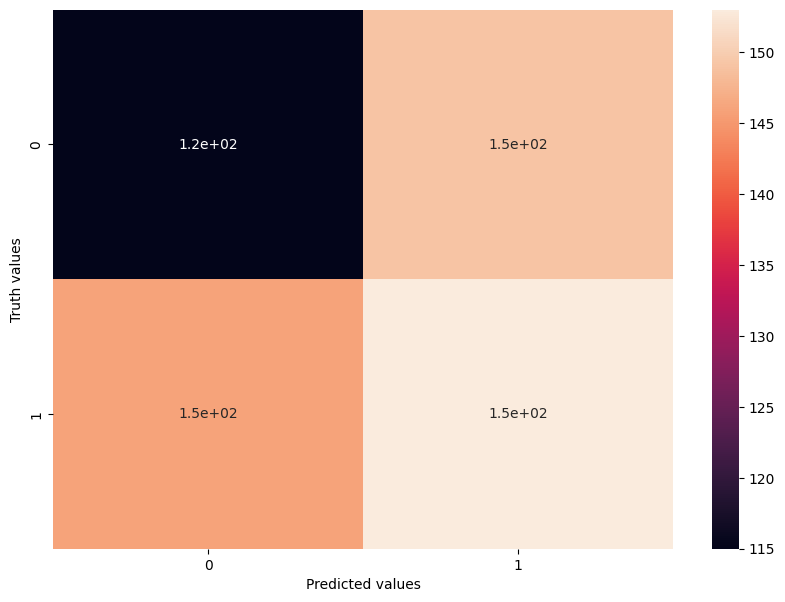

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)
d=DecisionTreeClassifier()
d=d.fit(X_train,Y_train)
Y_pred=d.predict(X_test)

In [ ]:
print('accuracy:',metrics.accuracy_score(Y_test,Y_pred)*100)
A3=metrics.accuracy_score(Y_test,Y_pred)*100

accuracy: 90.23090586145648


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[228,  36],
       [ 19, 280]])

Text(95.72222222222221, 0.5, 'Truth values')

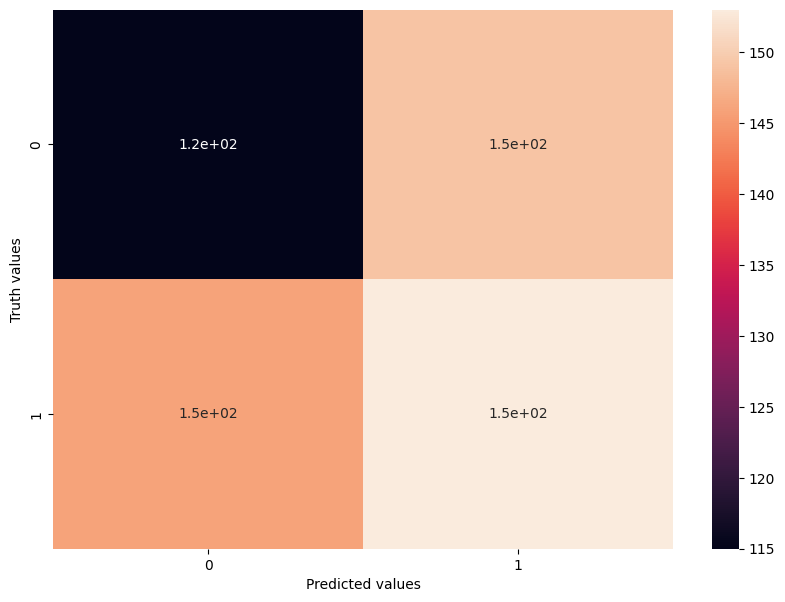

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy*100)
A4=accuracy*100

Accuracy: 92.22222222222223


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[194,  16],
       [ 15, 225]])

Text(95.72222222222221, 0.5, 'Truth values')

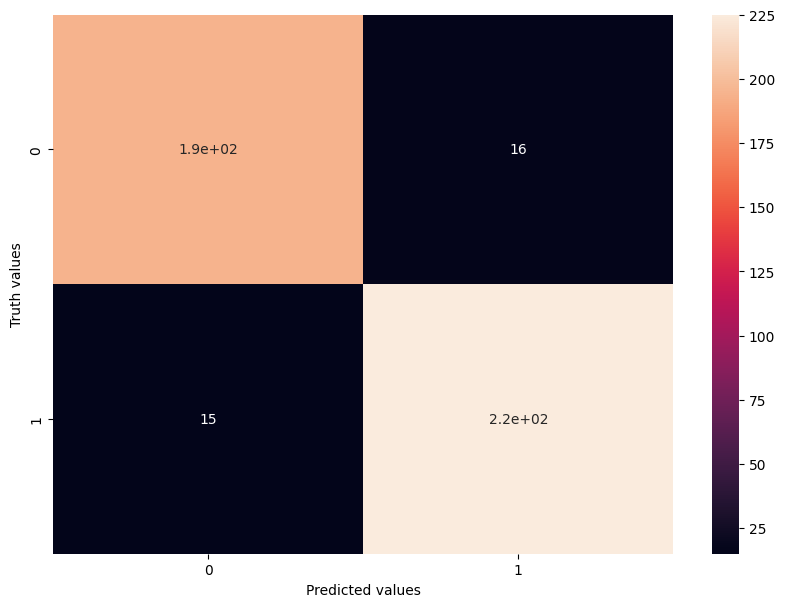

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

SVM

In [ ]:
from sklearn.svm import SVC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
sv = SVC()
sv.fit(X_train, Y_train)
print("Training Score:", sv.score(X_train, Y_train))
A5=sv.score(X_train,Y_train)*100
print("Testing Score:", sv.score(X_test, Y_test)*100)


Training Score: 0.9322222222222222
Testing Score: 87.55555555555556


In [ ]:
print("acurracy of svm is:",A5)

acurracy of svm is: 93.22222222222221


In [ ]:
y_pred = sv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[169,  30],
       [ 26, 225]])

Text(95.72222222222221, 0.5, 'Truth values')

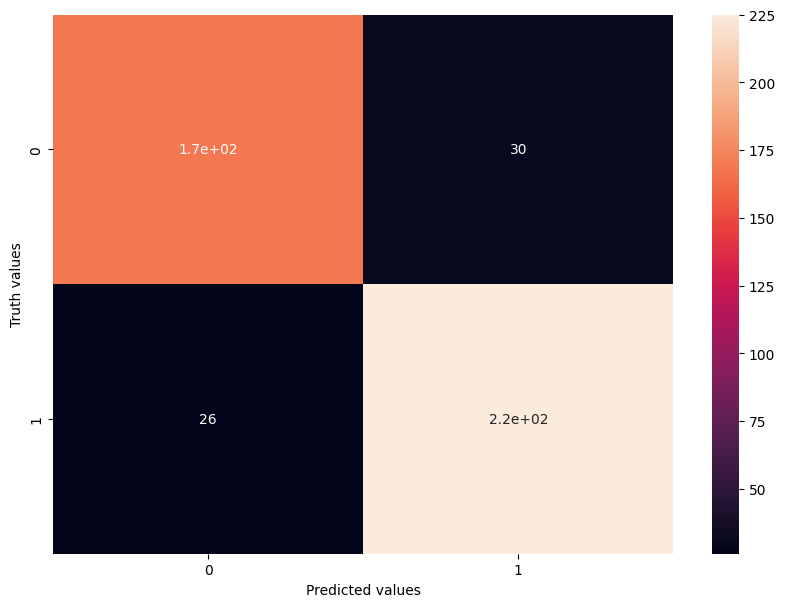

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

RATION OF ALL ACCURACY

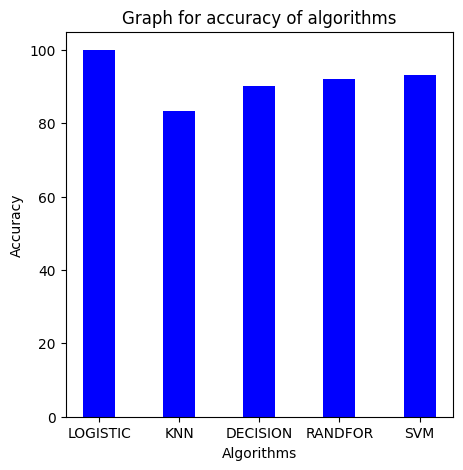

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


li=['LOGISTIC','KNN','DECISION','RANDFOR','SVM']
li1=[A1,A2,A3,A4,A5]
courses =li
values = li1
fig = plt.figure(figsize = (5,5))
plt.bar(courses, values, color ='blue',width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Graph for accuracy of algorithms")
plt.show()

In [ ]:
l3=max(li1)
if l3==A1:
  print('LOGISTIC REGRESSION GOT HIGHEST ACCURACY:',A1)
if l3==A2:
  print('KNN GOT HIGHEST ACCURACY:',A2)
if l3==A3:
  print('DECISION TREE GOT HIGHEST ACCURACY:',A3)
if l3==A4:
  print('RANDOM FOREST GOT HIGHEST ACCURACY:',A4)
if l3==A5:
  print('SVM  GOT HIGHEST ACCURACY:',A5)


LOGISTIC REGRESSION GOT HIGHEST ACCURACY: 100.0


TESTING THE MODEL

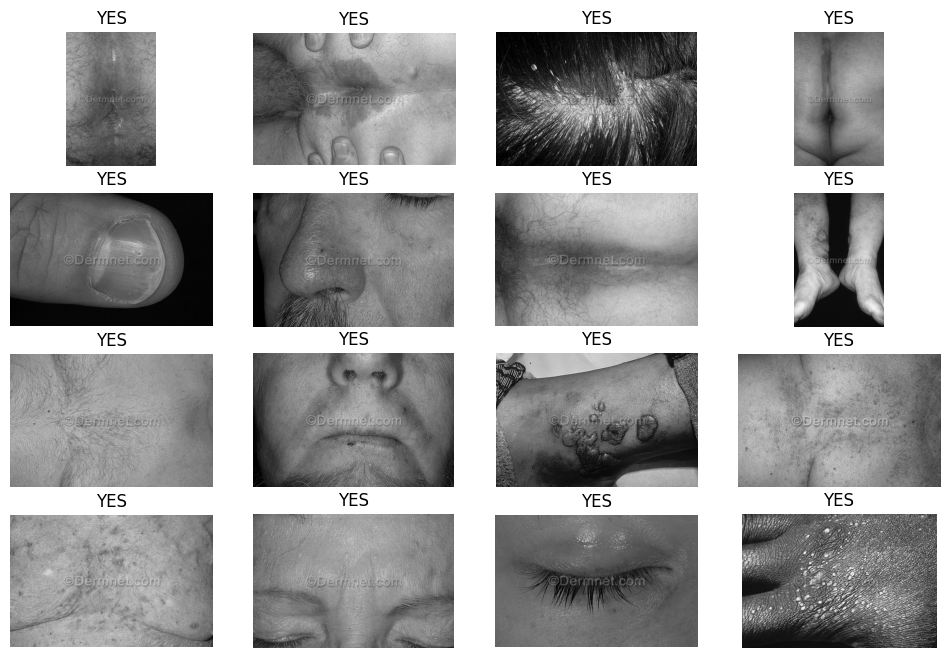

In [ ]:
dec={0:'NO',1:'YES'}
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/psorasis1/TEST')
c=1
for i in os.listdir('/content/drive/MyDrive/psorasis1/TEST/YES/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/psorasis1/TEST/YES/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

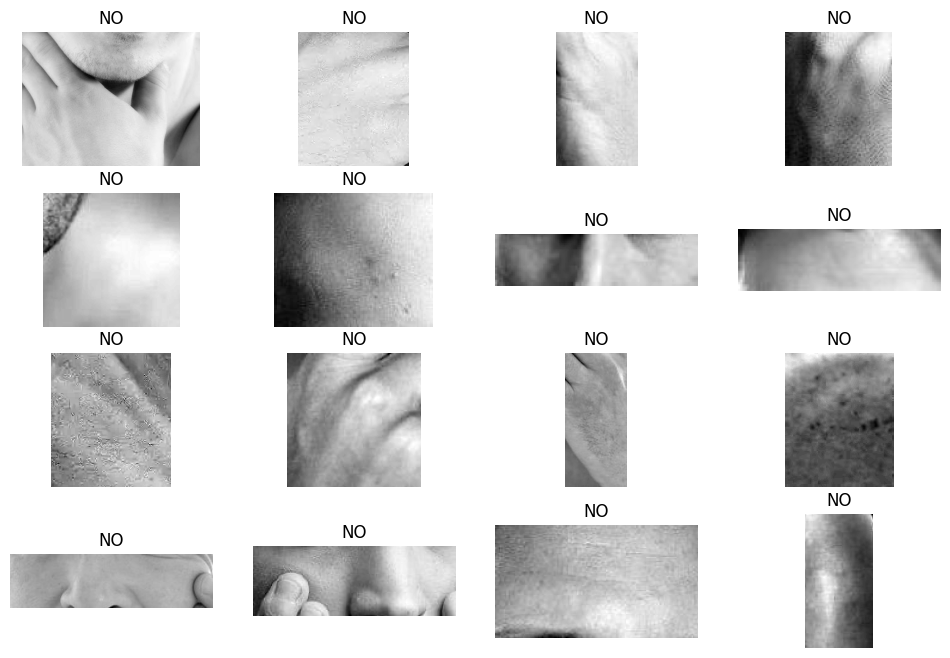

In [ ]:
dec={1:'YES',0:'NO'}
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/psorasis3/TEST')
c=1
for i in os.listdir('/content/drive/MyDrive/psorasis3/TEST/NO/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/psorasis3/TEST/NO/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1